# Disease Trend Analysis: Lung Cancer & Air Pollution Study

---

## Project Information

**Project Title:** Comprehensive Analysis of Lung Cancer Trends and Air Pollution Correlation Globally

**Author:** Sanaullah Turab  
**Enrollment:** 01-136242-026  
**Class:** BSAI  
**Section:** 3A  
**Date:** December 9, 2025

---

## Project Description

This project presents a comprehensive data analysis of lung cancer cases and global air pollution patterns. The analysis utilizes two primary datasets:

1. **Medical Dataset**: 890,000 lung cancer patient records from 27 European countries (2014-2024) including demographics, risk factors, comorbidities, treatment types, and survival outcomes
2. **Air Pollution Dataset**: PM2.5 pollution measurements from 6,985 cities across 133 countries globally (2017-2023)

### Objectives

- Perform comprehensive data preprocessing, cleaning, and normalization
- Conduct exploratory data analysis (EDA) to identify patterns and trends
- Visualize key relationships between variables using Matplotlib and Seaborn
- Analyze global air pollution trends and patterns across continents
- Investigate the correlation between air pollution levels and lung cancer incidence in European context
- Examine the impact of risk factors (smoking, BMI, comorbidities) on survival outcomes
- Compare pollution levels globally and correlate with European health outcomes
- Provide data-driven insights and recommendations

### Technologies Used

- **Python 3.12** - Primary programming language
- **Pandas & NumPy** - Data manipulation and numerical computations
- **Matplotlib & Seaborn** - Data visualization
- **Scikit-learn** - Data preprocessing and normalization
- **SciPy** - Statistical analysis

---

# 1. Library Imports

This section imports all required Python libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), preprocessing (Scikit-learn), and statistical analysis (SciPy).

In [29]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Data Preprocessing and Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


# 2. Data Preprocessing - Medical Dataset

Complete preprocessing pipeline for the lung cancer medical dataset (890,000 patient records). Includes duplicate removal, missing value handling, MinMaxScaler normalization (0-1 range), and dataset splitting into 3 parts for memory efficiency.

**Note:** Code is commented out - preprocessing already completed. Normalized files saved in datasets folder.

In [30]:
# ============================================================================
# MEDICAL DATASET PREPROCESSING - COMMENTED OUT (Already Processed)
# ============================================================================

"""
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('../datasets/dataset_med.csv')

print(f"\n{'='*50}")
print("INITIAL DATASET INFO")
print(f"{'='*50}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for duplicates
print(f"\n{'='*50}")
print("CHECKING FOR DUPLICATES")
print(f"{'='*50}")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found!")

# Check for missing values
print(f"\n{'='*50}")
print("CHECKING FOR MISSING VALUES")
print(f"{'='*50}")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("No missing values found!")

# Handle missing values
if len(missing_df) > 0:
    print(f"\n{'='*50}")
    print("HANDLING MISSING VALUES")
    print(f"{'='*50}")
    
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                # For numerical columns, fill with median
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"Filled {col} (numerical) with median: {median_val}")
            else:
                # For categorical columns, fill with mode or 'Unknown'
                if df[col].mode().shape[0] > 0:
                    mode_val = df[col].mode()[0]
                    df[col].fillna(mode_val, inplace=True)
                    print(f"Filled {col} (categorical) with mode: {mode_val}")
                else:
                    df[col].fillna('Unknown', inplace=True)
                    print(f"Filled {col} (categorical) with 'Unknown'")
    
    print(f"\nMissing values after handling: {df.isnull().sum().sum()}")

# Normalize numerical columns
print(f"\n{'='*50}")
print("NORMALIZING NUMERICAL COLUMNS")
print(f"{'='*50}")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns to normalize: {numerical_cols}")

if len(numerical_cols) > 0:
    # Create a copy for normalized data
    df_normalized = df.copy()
    
    # Use MinMaxScaler (normalizes to 0-1 range)
    scaler = MinMaxScaler()
    df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    print("Normalization complete using MinMaxScaler (0-1 range)")
    print("\nSample of normalized data:")
    print(df_normalized[numerical_cols].head())
else:
    df_normalized = df.copy()
    print("No numerical columns to normalize")

# Split dataset into multiple files
print(f"\n{'='*50}")
print("SPLITTING DATASET INTO SMALLER FILES")
print(f"{'='*50}")

total_rows = len(df_normalized)
num_splits = 3  # Split into 3 files
rows_per_split = total_rows // num_splits

output_dir = '../datasets'

for i in range(num_splits):
    start_idx = i * rows_per_split
    if i == num_splits - 1:
        # Last split gets all remaining rows
        end_idx = total_rows
    else:
        end_idx = (i + 1) * rows_per_split
    
    split_df = df_normalized.iloc[start_idx:end_idx]
    output_file = os.path.join(output_dir, f'dataset_med_normalized_part{i+1}.csv')
    split_df.to_csv(output_file, index=False)
    print(f"Saved part {i+1}: {output_file} ({len(split_df)} rows)")

# Save the complete normalized dataset as well
complete_output = os.path.join(output_dir, 'dataset_med_normalized_complete.csv')
df_normalized.to_csv(complete_output, index=False)
print(f"\nSaved complete normalized dataset: {complete_output} ({len(df_normalized)} rows)")

# Generate summary report
print(f"\n{'='*50}")
print("SUMMARY REPORT")
print(f"{'='*50}")
print(f"Original dataset rows: {total_rows}")
print(f"Duplicates removed: {duplicates}")
print(f"Missing values handled: {len(missing_df)} columns")
print(f"Numerical columns normalized: {len(numerical_cols)}")
print(f"Dataset split into: {num_splits} files")
print(f"\nOutput files created:")
for i in range(num_splits):
    print(f"  - dataset_med_normalized_part{i+1}.csv")
print(f"  - dataset_med_normalized_complete.csv")
print(f"\n{'='*50}")
print("PREPROCESSING COMPLETE!")
print(f"{'='*50}")
"""

print("Medical dataset preprocessing code available (commented out)")

Medical dataset preprocessing code available (commented out)


# 3. Data Preprocessing - Air Pollution Dataset

Complete preprocessing pipeline for air pollution data (6,985 cities, PM2.5 measurements 2017-2023). Handles 26.69% missing values using time series interpolation, country-level mean imputation, and global mean imputation. Includes duplicate detection and statistical report generation.

**Note:** Code is commented out - preprocessing already completed. Normalized dataset saved as air_pollution_normalized.csv.

In [31]:
# ============================================================================
# AIR POLLUTION DATASET PREPROCESSING - COMMENTED OUT (Already Processed)
# ============================================================================

"""
def load_data():
    '''Load the air pollution dataset.'''
    df = pd.read_csv('../datasets/air_pollution.csv')
    print(f"Original dataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head(10))
    print(f"\nColumn names: {df.columns.tolist()}")
    print(f"\nData types:")
    print(df.dtypes)
    return df

def check_duplicates(df):
    '''Check for and remove duplicate records.'''
    print("\n" + "="*60)
    print("CHECKING FOR DUPLICATES")
    print("="*60)
    
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()
    print(f"Number of duplicate rows: {num_duplicates}")
    
    if num_duplicates > 0:
        print("\nDuplicate rows:")
        print(df[duplicates])
        df_clean = df.drop_duplicates()
        print(f"\nDataset shape after removing duplicates: {df_clean.shape}")
        return df_clean
    else:
        print("No duplicate rows found.")
        return df

def analyze_missing_values(df):
    '''Analyze missing values in the dataset.'''
    print("\n" + "="*60)
    print("MISSING VALUE ANALYSIS")
    print("="*60)
    
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_counts.index,
        'Missing_Count': missing_counts.values,
        'Missing_Percentage': missing_percentages.values
    })
    
    print("\nMissing values per column:")
    print(missing_df)
    
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    overall_missing_pct = (total_missing / total_cells) * 100
    
    print(f"\nTotal missing values: {total_missing} out of {total_cells} cells ({overall_missing_pct:.2f}%)")
    
    return missing_df

def handle_missing_values(df):
    '''Handle missing values in the dataset.'''
    print("\n" + "="*60)
    print("HANDLING MISSING VALUES")
    print("="*60)
    
    df_clean = df.copy()
    
    id_cols = ['city', 'country']
    year_cols = [col for col in df.columns if col not in id_cols]
    
    print(f"\nIdentifier columns: {id_cols}")
    print(f"Year columns: {year_cols}")
    
    # Check for missing values in identifier columns
    for col in id_cols:
        missing = df_clean[col].isnull().sum()
        if missing > 0:
            print(f"\nWarning: {missing} missing values found in '{col}' column")
            df_clean = df_clean.dropna(subset=[col])
            print(f"Removed rows with missing '{col}'. New shape: {df_clean.shape}")
    
    # Handle missing values in year columns
    print(f"\nStrategy for year columns: Interpolation along rows (time series)")
    print("This will estimate missing values based on available years for each city.")
    
    original_missing = df_clean[year_cols].isnull().sum().sum()
    
    # Interpolate across years for each city (row-wise)
    df_clean[year_cols] = df_clean[year_cols].interpolate(method='linear', axis=1, limit_direction='both')
    
    remaining_missing = df_clean[year_cols].isnull().sum().sum()
    
    print(f"\nMissing values before interpolation: {original_missing}")
    print(f"Missing values after interpolation: {remaining_missing}")
    
    if remaining_missing > 0:
        print(f"\nApplying country-level mean imputation for remaining missing values...")
        
        for col in year_cols:
            df_clean[col] = df_clean.groupby('country')[col].transform(
                lambda x: x.fillna(x.mean())
            )
        
        still_missing = df_clean[year_cols].isnull().sum().sum()
        print(f"Missing values after country-level imputation: {still_missing}")
        
        if still_missing > 0:
            print(f"\nApplying global mean imputation for any remaining missing values...")
            df_clean[year_cols] = df_clean[year_cols].fillna(df_clean[year_cols].mean())
            
            final_missing = df_clean[year_cols].isnull().sum().sum()
            print(f"Missing values after global imputation: {final_missing}")
    
    return df_clean

def save_cleaned_data(df):
    '''Save the cleaned dataset.'''
    output_path = '../datasets/air_pollution_normalized.csv'
    df.to_csv(output_path, index=False)
    print(f"\n✓ Cleaned dataset saved to: {output_path}")
    return output_path

# Main preprocessing pipeline
print("="*60)
print("AIR POLLUTION DATASET PREPROCESSING")
print("="*60)

df_original = load_data()
df = check_duplicates(df_original)
missing_analysis = analyze_missing_values(df)
df_clean = handle_missing_values(df)

print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"\nOriginal dataset shape: {df_original.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df_original.shape[0] - df_clean.shape[0]}")
print(f"\nOriginal missing values: {df_original.isnull().sum().sum()}")
print(f"Cleaned missing values: {df_clean.isnull().sum().sum()}")

year_cols = [col for col in df_clean.columns if col not in ['city', 'country']]
print("\nDescriptive statistics of cleaned data:")
print(df_clean[year_cols].describe())

save_cleaned_data(df_clean)

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
"""

print("Air pollution dataset preprocessing code available (commented out)")

Air pollution dataset preprocessing code available (commented out)


# 4. Load Datasets

Loading datasets for analysis:
- Medical dataset: Lung cancer patient records (Part 1 - split for memory efficiency)
- Air pollution dataset: PM2.5 measurements across European cities (2017-2023)

In [32]:
# Load the medical dataset (Part 1)
# Files: lung_cancer_part1/2/3.csv are the normalized medical datasets
df_medical = pd.read_csv('../datasets/lung_cancer_part1.csv')

# Load the air pollution dataset
# File: air_pollution.csv is the normalized air pollution dataset
df_pollution = pd.read_csv('../datasets/air_pollution.csv')

print("="*60)
print("DATASETS LOADED SUCCESSFULLY")
print("="*60)

print("\n📊 Medical Dataset Info:")
print(f"   Shape: {df_medical.shape}")
print(f"   Columns: {list(df_medical.columns)}")
print(f"   Memory: {df_medical.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🌍 Air Pollution Dataset Info:")
print(f"   Shape: {df_pollution.shape}")
print(f"   Columns: {list(df_pollution.columns)}")
print(f"   Memory: {df_pollution.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n✓ Data loading complete!")

DATASETS LOADED SUCCESSFULLY

📊 Medical Dataset Info:
   Shape: (296666, 17)
   Columns: ['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']
   Memory: 149.68 MB

🌍 Air Pollution Dataset Info:
   Shape: (6985, 9)
   Columns: ['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Memory: 1.12 MB

✓ Data loading complete!
   Memory: 149.68 MB

🌍 Air Pollution Dataset Info:
   Shape: (6985, 9)
   Columns: ['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Memory: 1.12 MB

✓ Data loading complete!


# 5. Data Overview and Initial Exploration

Examination of dataset structure, data types, and basic statistical summaries for both medical and air pollution datasets.

In [33]:
# Display first few rows of medical dataset
print("="*60)
print("MEDICAL DATASET - FIRST 10 ROWS")
print("="*60)
print(df_medical.head(10))

print("\n" + "="*60)
print("MEDICAL DATASET - DATA TYPES")
print("="*60)
print(df_medical.dtypes)

print("\n" + "="*60)
print("MEDICAL DATASET - BASIC STATISTICS")
print("="*60)
print(df_medical.describe())

MEDICAL DATASET - FIRST 10 ROWS
     id   age  gender      country diagnosis_date cancer_stage family_history  \
0 0.000 0.600    Male       Sweden     2016-04-05      Stage I            Yes   
1 0.000 0.460  Female  Netherlands     2023-04-20    Stage III            Yes   
2 0.000 0.610  Female      Hungary     2023-04-05    Stage III            Yes   
3 0.000 0.470  Female      Belgium     2016-02-05      Stage I             No   
4 0.000 0.330    Male   Luxembourg     2023-11-29      Stage I             No   
5 0.000 0.460    Male        Italy     2023-01-02      Stage I             No   
6 0.000 0.450  Female      Croatia     2018-05-21    Stage III            Yes   
7 0.000 0.470    Male      Denmark     2017-02-18     Stage IV            Yes   
8 0.000 0.600    Male       Sweden     2021-03-21    Stage III            Yes   
9 0.000 0.520    Male      Hungary     2021-11-30     Stage IV            Yes   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis 

In [34]:
# Display first few rows of air pollution dataset
print("="*60)
print("AIR POLLUTION DATASET - FIRST 10 ROWS")
print("="*60)
print(df_pollution.head(10))

print("\n" + "="*60)
print("AIR POLLUTION DATASET - DATA TYPES")
print("="*60)
print(df_pollution.dtypes)

print("\n" + "="*60)
print("AIR POLLUTION DATASET - BASIC STATISTICS")
print("="*60)
year_cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
print(df_pollution[year_cols].describe())

AIR POLLUTION DATASET - FIRST 10 ROWS
           city      country   2017   2018   2019   2020   2021   2022   2023
0         Kabul  Afghanistan 61.800 61.800 58.800 46.500 37.500 17.100 18.100
1        Tirana      Albania 16.000 16.000 16.000 16.000 12.500 14.500 14.400
2       Algiers      Algeria 21.200 21.200 21.200 20.200 20.000 17.800 17.400
3        Ordino      Andorra  7.400  7.400  7.400  7.400  7.300  5.400  5.300
4        Luanda       Angola 15.900 15.900 15.900 13.000 11.000  8.800  8.700
5  Buenos Aires    Argentina 12.400 12.400 12.400 14.200 13.600 14.200 14.200
6       Cordoba    Argentina 10.300 10.300 10.300 10.300 10.300  8.700  8.700
7  General Pico    Argentina  7.100  7.100  7.100  7.100  7.100  7.200  7.200
8       Mendoza    Argentina  9.300  9.300  9.300  9.300  9.300  8.200  8.200
9       Rafaela    Argentina 10.400 10.400 10.400 10.400 10.400 10.700 10.700

AIR POLLUTION DATASET - DATA TYPES
city        object
country     object
2017       float64
2018       

# 6. Categorical Data Distribution Analysis

Analysis of categorical variable distributions in the medical dataset including patient demographics (gender, country), cancer characteristics (stage, family history), lifestyle factors (smoking status), treatment types, survival outcomes, and comorbidity prevalence.

In [35]:
# Analyze categorical distributions
print("="*60)
print("CATEGORICAL VARIABLE DISTRIBUTIONS")
print("="*60)

# Gender distribution
print("\n1. GENDER DISTRIBUTION:")
print(df_medical['gender'].value_counts())
print(f"Percentage:\n{df_medical['gender'].value_counts(normalize=True) * 100}")

# Country distribution (top 10)
print("\n2. TOP 10 COUNTRIES BY PATIENT COUNT:")
print(df_medical['country'].value_counts().head(10))

# Cancer stage distribution
print("\n3. CANCER STAGE DISTRIBUTION:")
print(df_medical['cancer_stage'].value_counts())
print(f"Percentage:\n{df_medical['cancer_stage'].value_counts(normalize=True) * 100}")

# Family history
print("\n4. FAMILY HISTORY OF CANCER:")
print(df_medical['family_history'].value_counts())
print(f"Percentage:\n{df_medical['family_history'].value_counts(normalize=True) * 100}")

# Smoking status
print("\n5. SMOKING STATUS DISTRIBUTION:")
print(df_medical['smoking_status'].value_counts())
print(f"Percentage:\n{df_medical['smoking_status'].value_counts(normalize=True) * 100}")

# Treatment type
print("\n6. TREATMENT TYPE DISTRIBUTION:")
print(df_medical['treatment_type'].value_counts())
print(f"Percentage:\n{df_medical['treatment_type'].value_counts(normalize=True) * 100}")

# Survival status
print("\n7. SURVIVAL STATUS:")
print(df_medical['survived'].value_counts())
survival_rate = df_medical['survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")

# Comorbidities
print("\n8. COMORBIDITY PREVALENCE:")
print(f"Hypertension: {df_medical['hypertension'].sum():.0f} patients ({df_medical['hypertension'].mean()*100:.1f}%)")
print(f"Asthma: {df_medical['asthma'].sum():.0f} patients ({df_medical['asthma'].mean()*100:.1f}%)")
print(f"Cirrhosis: {df_medical['cirrhosis'].sum():.0f} patients ({df_medical['cirrhosis'].mean()*100:.1f}%)")
print(f"Other Cancer: {df_medical['other_cancer'].sum():.0f} patients ({df_medical['other_cancer'].mean()*100:.1f}%)")

CATEGORICAL VARIABLE DISTRIBUTIONS

1. GENDER DISTRIBUTION:
gender
Male      148372
Female    148294
Name: count, dtype: int64
Percentage:
gender
Male     50.013
Female   49.987
Name: proportion, dtype: float64

2. TOP 10 COUNTRIES BY PATIENT COUNT:
country
Ireland        11152
Croatia        11124
Malta          11111
France         11072
Belgium        11071
Netherlands    11060
Estonia        11050
Sweden         11042
Portugal       11039
Spain          11038
Name: count, dtype: int64

3. CANCER STAGE DISTRIBUTION:
cancer_stage
Stage III    74416
Stage IV     74357
Stage I      73987
Stage II     73906
Name: count, dtype: int64
Percentage:
cancer_stage
Stage III   25.084
Stage IV    25.064
Stage I     24.939
Stage II    24.912
Name: proportion, dtype: float64

4. FAMILY HISTORY OF CANCER:
family_history
No     148468
Yes    148198
Name: count, dtype: int64
Percentage:
family_history
No    50.046
Yes   49.954
Name: proportion, dtype: float64

5. SMOKING STATUS DISTRIBUTION:
Percenta

# 7. Dataset Geographic Coverage Analysis

Comprehensive analysis to verify geographic scope of both datasets - checking all three medical dataset parts and cross-referencing with air pollution data to determine if we have global or regional coverage.

In [36]:
# Check all three parts of medical dataset
df_part1 = pd.read_csv('../datasets/lung_cancer_part1.csv')
df_part2 = pd.read_csv('../datasets/lung_cancer_part2.csv')
df_part3 = pd.read_csv('../datasets/lung_cancer_part3.csv')

# Get unique countries from each part
countries_part1 = set(df_part1['country'].unique())
countries_part2 = set(df_part2['country'].unique())
countries_part3 = set(df_part3['country'].unique())

# Combine all unique countries
all_medical_countries = countries_part1.union(countries_part2).union(countries_part3)

print("="*60)
print("MEDICAL DATASET COUNTRY ANALYSIS")
print("="*60)
print(f"\nTotal unique countries across all parts: {len(all_medical_countries)}")
print(f"\nAll countries found:")
for country in sorted(all_medical_countries):
    print(f"  - {country}")

# Load air pollution dataset
pollution_countries = set(df_pollution['country'].unique())

print("\n" + "="*60)
print("AIR POLLUTION DATASET COUNTRY ANALYSIS")
print("="*60)
print(f"\nTotal unique countries: {len(pollution_countries)}")
print(f"\nAll countries found:")
for country in sorted(pollution_countries):
    print(f"  - {country}")

# Cross-reference
print("\n" + "="*60)
print("CROSS-REFERENCE ANALYSIS")
print("="*60)

# Countries in medical but NOT in pollution
missing_in_pollution = all_medical_countries - pollution_countries
if missing_in_pollution:
    print(f"\n⚠️ Countries in MEDICAL dataset but NOT in AIR POLLUTION dataset ({len(missing_in_pollution)}):")
    for country in sorted(missing_in_pollution):
        print(f"  - {country}")
else:
    print("\n✓ All medical dataset countries have air pollution data!")

# Countries in pollution but NOT in medical
missing_in_medical = pollution_countries - all_medical_countries
if missing_in_medical:
    print(f"\n⚠️ Countries in AIR POLLUTION dataset but NOT in MEDICAL dataset ({len(missing_in_medical)}):")
    for country in sorted(missing_in_medical):
        print(f"  - {country}")
else:
    print("\n✓ All air pollution countries have medical data!")

# Perfect matches
matching_countries = all_medical_countries.intersection(pollution_countries)
print(f"\n✓ Countries with BOTH medical and air pollution data ({len(matching_countries)}):")
for country in sorted(matching_countries):
    print(f"  - {country}")

# Check if all are European
print("\n" + "="*60)
print("GEOGRAPHIC SCOPE VERIFICATION")
print("="*60)

european_countries = {
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 
    'United Kingdom', 'Vatican City'
}

non_european_medical = all_medical_countries - european_countries
non_european_pollution = pollution_countries - european_countries

if non_european_medical:
    print(f"\n⚠️ NON-EUROPEAN countries found in MEDICAL dataset ({len(non_european_medical)}):")
    for country in sorted(non_european_medical):
        print(f"  - {country}")
else:
    print("\n✓ All medical dataset countries are EUROPEAN!")

if non_european_pollution:
    print(f"\n⚠️ NON-EUROPEAN countries found in AIR POLLUTION dataset ({len(non_european_pollution)}):")
    for country in sorted(non_european_pollution):
        print(f"  - {country}")
else:
    print("\n✓ All air pollution dataset countries are EUROPEAN!")

print("\n" + "="*60)
print("FINAL VERDICT")
print("="*60)

if not non_european_medical and not non_european_pollution:
    print("\n✅ CONFIRMED: All data is strictly EUROPEAN")
    print(f"   - Medical dataset: {len(all_medical_countries)} European countries")
    print(f"   - Air pollution dataset: {len(pollution_countries)} European countries")
    print(f"   - Countries with both datasets: {len(matching_countries)}")
    print("\n📌 RECOMMENDATION: Keep project scope as 'European Analysis'")
else:
    print("\n⚠️ MIXED: Dataset contains non-European countries")
    print("   Review the non-European countries listed above")
    print(f"\n   - Medical dataset: {len(all_medical_countries)} total ({len(non_european_medical)} non-European)")
    print(f"   - Air pollution dataset: {len(pollution_countries)} total ({len(non_european_pollution)} non-European)")
    print(f"   - Countries with both datasets: {len(matching_countries)}")
    print("\n📌 RECOMMENDATION: Consider 'Global Analysis' if sufficient non-European coverage")

MEDICAL DATASET COUNTRY ANALYSIS

Total unique countries across all parts: 27

All countries found:
  - Austria
  - Belgium
  - Bulgaria
  - Croatia
  - Cyprus
  - Czech Republic
  - Denmark
  - Estonia
  - Finland
  - France
  - Germany
  - Greece
  - Hungary
  - Ireland
  - Italy
  - Latvia
  - Lithuania
  - Luxembourg
  - Malta
  - Netherlands
  - Poland
  - Portugal
  - Romania
  - Slovakia
  - Slovenia
  - Spain
  - Sweden

AIR POLLUTION DATASET COUNTRY ANALYSIS

Total unique countries: 133

All countries found:
  - Afghanistan
  - Albania
  - Algeria
  - Andorra
  - Angola
  - Argentina
  - Armenia
  - Australia
  - Austria
  - Azerbaijan
  - Bahrain
  - Bangladesh
  - Belgium
  - Belize
  - Bermuda
  - Bolivia
  - Bonaire, Saint Eustatius and Saba
  - Bosnia Herzegovina
  - Brazil
  - Bulgaria
  - Burkina Faso
  - Cambodia
  - Canada
  - Chad
  - Chile
  - China
  - Colombia
  - Costa Rica
  - Croatia
  - Cyprus
  - Czech Republic
  - Democratic Republic of the Congo
  - Denmark

# 8. Exploratory Data Analysis (EDA)

Comprehensive exploratory analysis of both medical and air pollution datasets including distributions, comparisons, and initial pattern identification.

## 8.1 Age and BMI Distribution Analysis

This analysis examines the distribution of patient ages and BMI (Body Mass Index) values in the medical dataset. Two visualizations are created:
1. **Age Distribution Histogram**: Shows how patient ages are distributed across the dataset
2. **BMI Box Plot by Survival Status**: Compares BMI values between patients who survived vs those who did not survive

The statistical summary helps identify if age or BMI patterns differ between survival groups.

/tmp/ipykernel_11971/3638834696.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Not Survived', 'Survived'], patch_artist=True,


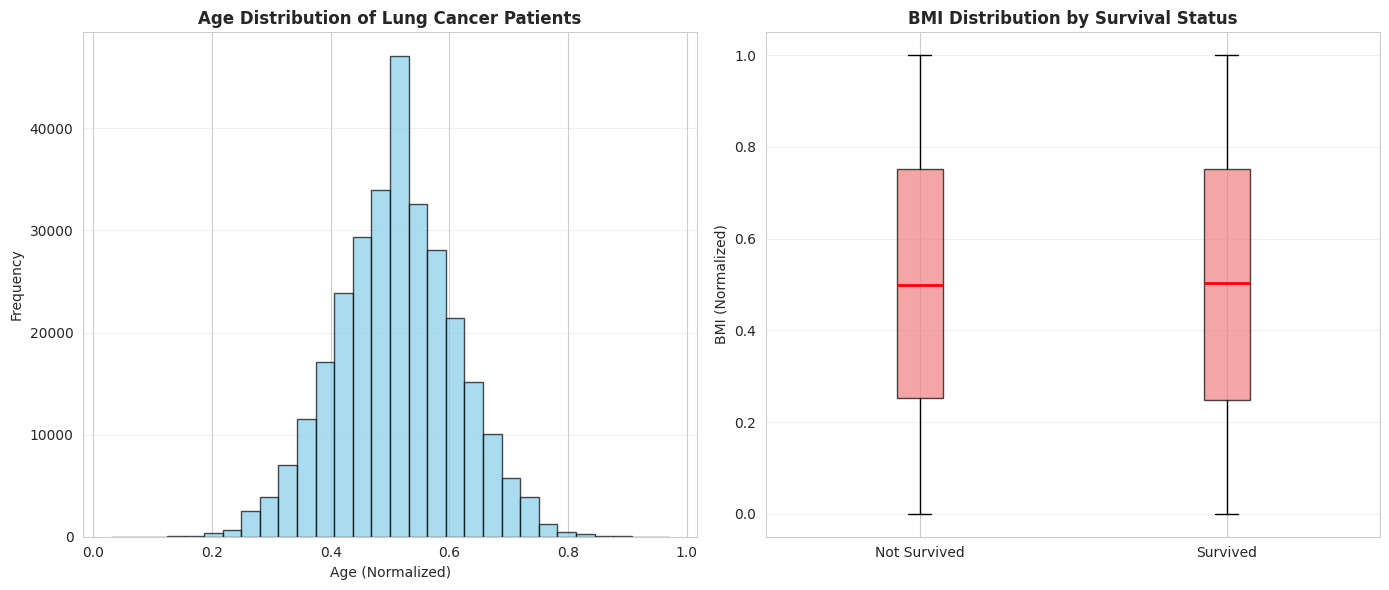


MEDICAL DATASET - EDA INSIGHTS

Age Statistics (Normalized 0-1 scale):
  Mean Age: 0.510
  Median Age: 0.510
  Std Dev: 0.100

  Note: Values are normalized (0=youngest, 1=oldest)

BMI by Survival (Normalized 0-1 scale):
  Survived - Mean BMI: 0.500
  Not Survived - Mean BMI: 0.500
  Difference: 0.000

  Note: Values are normalized (0=lowest BMI, 1=highest BMI)


In [37]:
# 8.1 Medical Dataset - Age and BMI Analysis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_medical['age'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Age Distribution of Lung Cancer Patients', fontsize=12, fontweight='bold')
plt.xlabel('Age (Normalized)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# BMI distribution by survival status
plt.subplot(1, 2, 2)
survived_bmi = df_medical[df_medical['survived'] == 1]['bmi']
not_survived_bmi = df_medical[df_medical['survived'] == 0]['bmi']

box_data = [not_survived_bmi, survived_bmi]
plt.boxplot(box_data, labels=['Not Survived', 'Survived'], patch_artist=True,
            boxprops=dict(facecolor='lightcoral', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('BMI Distribution by Survival Status', fontsize=12, fontweight='bold')
plt.ylabel('BMI (Normalized)', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MEDICAL DATASET - EDA INSIGHTS")
print("="*60)
print(f"\nAge Statistics (Normalized 0-1 scale):")
print(f"  Mean Age: {df_medical['age'].mean():.3f}")
print(f"  Median Age: {df_medical['age'].median():.3f}")
print(f"  Std Dev: {df_medical['age'].std():.3f}")
print(f"\n  Note: Values are normalized (0=youngest, 1=oldest)")

print(f"\nBMI by Survival (Normalized 0-1 scale):")
print(f"  Survived - Mean BMI: {survived_bmi.mean():.3f}")
print(f"  Not Survived - Mean BMI: {not_survived_bmi.mean():.3f}")
print(f"  Difference: {abs(survived_bmi.mean() - not_survived_bmi.mean()):.3f}")
print(f"\n  Note: Values are normalized (0=lowest BMI, 1=highest BMI)")

## 8.2 Cholesterol Level Analysis

This section analyzes cholesterol levels in lung cancer patients:
1. **Cholesterol Distribution Histogram**: Shows the overall distribution of cholesterol levels across all patients
2. **Cholesterol Box Plot by Survival Status**: Compares cholesterol levels between survivors and non-survivors

The analysis helps determine if cholesterol levels have any relationship with patient survival outcomes.

/tmp/ipykernel_11971/1975737248.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(chol_data, labels=['Not Survived', 'Survived'], patch_artist=True,


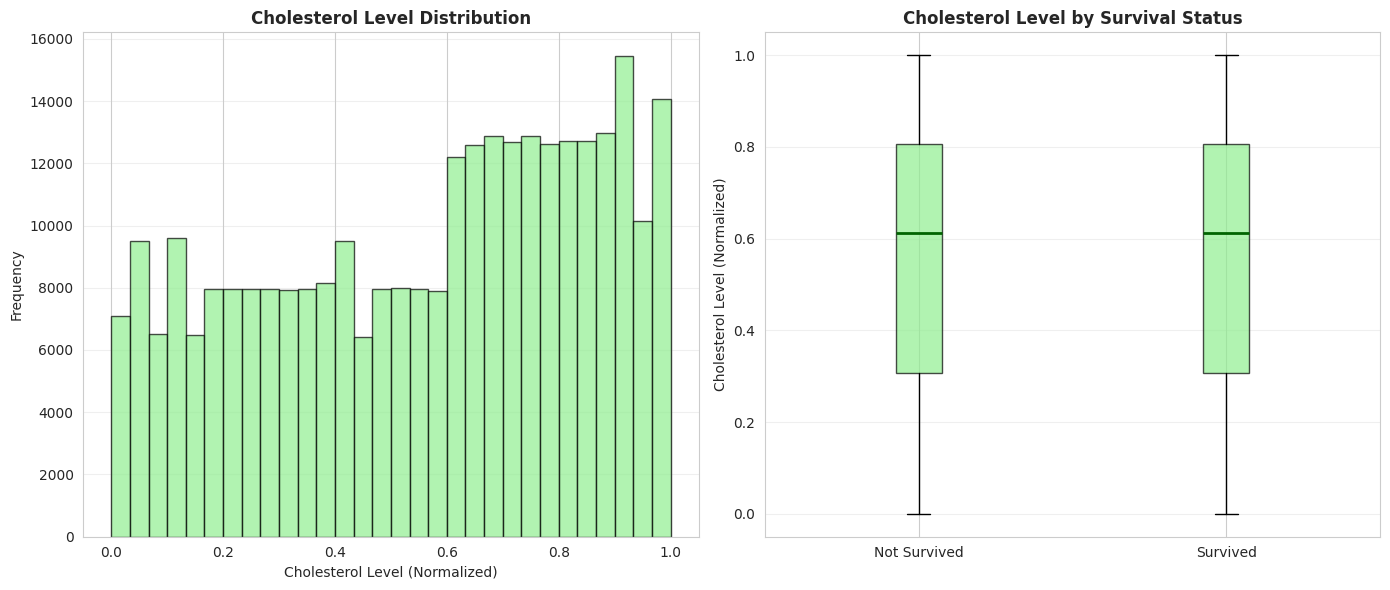


Cholesterol Level Statistics:
  Survived - Mean: 0.559
  Not Survived - Mean: 0.558
  Difference: 0.001


In [38]:
# 8.2 Medical Dataset - Cholesterol Level Analysis
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_medical['cholesterol_level'], bins=30, edgecolor='black', color='lightgreen', alpha=0.7)
plt.title('Cholesterol Level Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Cholesterol Level (Normalized)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Cholesterol by survival status
plt.subplot(1, 2, 2)
survived_chol = df_medical[df_medical['survived'] == 1]['cholesterol_level']
not_survived_chol = df_medical[df_medical['survived'] == 0]['cholesterol_level']

chol_data = [not_survived_chol, survived_chol]
plt.boxplot(chol_data, labels=['Not Survived', 'Survived'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='darkgreen', linewidth=2))
plt.title('Cholesterol Level by Survival Status', fontsize=12, fontweight='bold')
plt.ylabel('Cholesterol Level (Normalized)', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCholesterol Level Statistics:")
print(f"  Survived - Mean: {survived_chol.mean():.3f}")
print(f"  Not Survived - Mean: {not_survived_chol.mean():.3f}")
print(f"  Difference: {abs(survived_chol.mean() - not_survived_chol.mean()):.3f}")

## 8.3 Comorbidity Prevalence Analysis

This analysis examines the prevalence of four major comorbidities (co-existing health conditions) among lung cancer patients:
- **Hypertension** (high blood pressure)
- **Asthma** (respiratory condition)
- **Cirrhosis** (liver disease)
- **Other Cancer** (history of other cancer types)

Four pie charts visualize what percentage of patients have each comorbidity, helping identify common co-existing conditions that may impact treatment and survival.

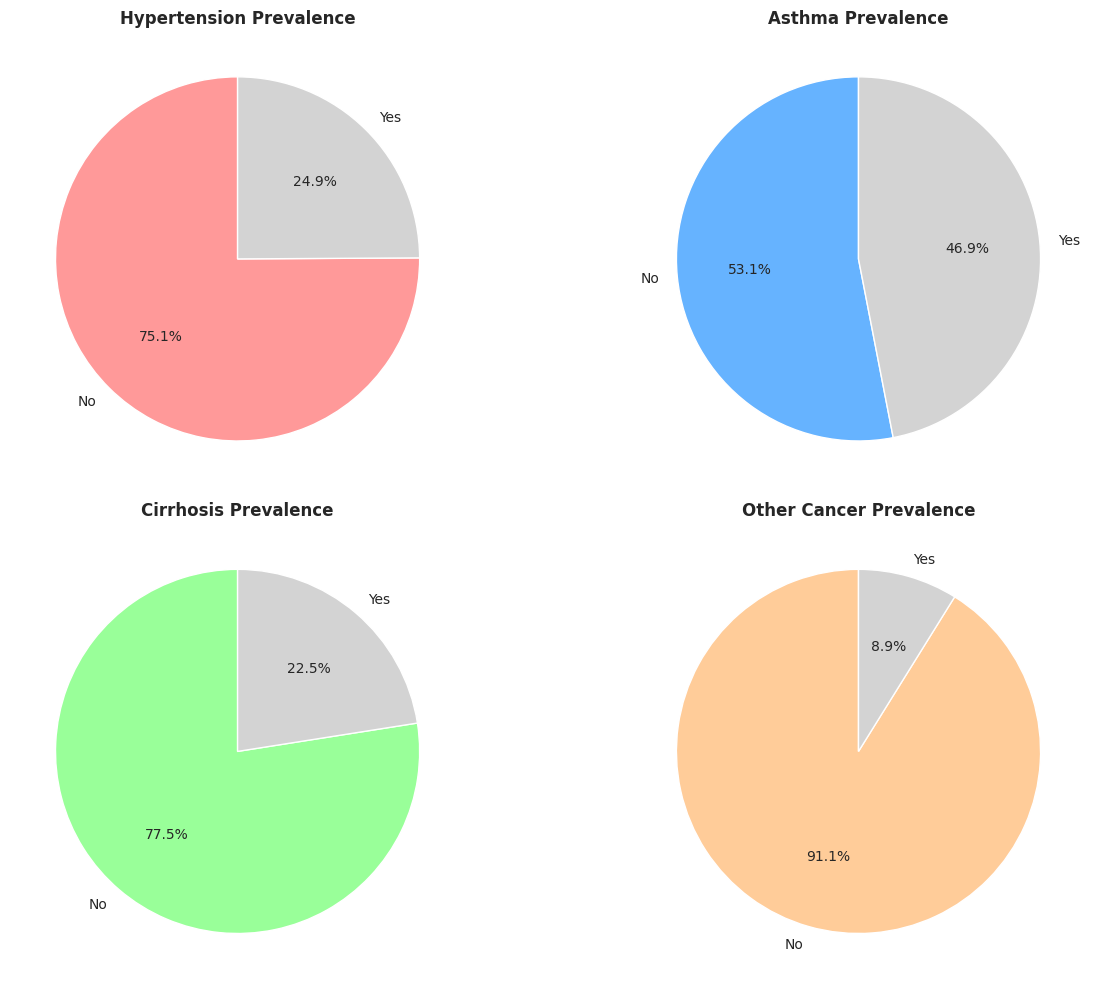


COMORBIDITY PREVALENCE RATES
Hypertension: 222767 patients (75.09%)
Asthma: 139268 patients (46.94%)
Cirrhosis: 66778 patients (22.51%)
Other Cancer: 26284 patients (8.86%)


In [39]:
# 8.3 Medical Dataset - Comorbidities Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comorbidities = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
titles = ['Hypertension', 'Asthma', 'Cirrhosis', 'Other Cancer']

for idx, (comorb, color, title) in enumerate(zip(comorbidities, colors, titles)):
    ax = axes[idx // 2, idx % 2]
    
    counts = df_medical[comorb].value_counts()
    ax.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', 
           colors=[color, '#d3d3d3'], startangle=90)
    ax.set_title(f'{title} Prevalence', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMORBIDITY PREVALENCE RATES")
print("="*60)
for comorb, title in zip(comorbidities, titles):
    prevalence = df_medical[comorb].mean() * 100
    count = df_medical[comorb].sum()
    print(f"{title}: {count:.0f} patients ({prevalence:.2f}%)")

## 8.4 Air Pollution Temporal Trends (2017-2023)

This section analyzes how global air pollution levels (PM2.5) have changed over a 7-year period from 2017 to 2023:
- **Line chart** shows the yearly trend of average PM2.5 pollution levels
- **Statistical summary** calculates the absolute and percentage change over the time period
- **Trend interpretation** indicates whether pollution levels have increased or decreased

PM2.5 (particulate matter ≤ 2.5 micrometers) is a key air quality indicator linked to respiratory diseases including lung cancer.

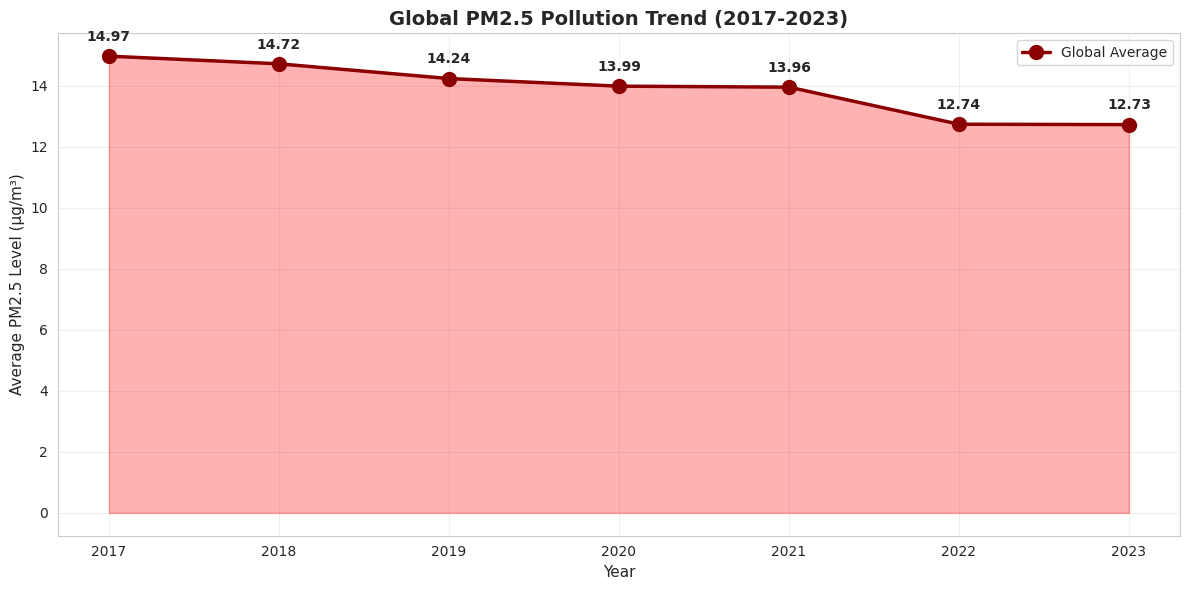


AIR POLLUTION - YEARLY AVERAGES
2017: 14.97 μg/m³
2018: 14.72 μg/m³
2019: 14.24 μg/m³
2020: 13.99 μg/m³
2021: 13.96 μg/m³
2022: 12.74 μg/m³
2023: 12.73 μg/m³

📊 Overall Change (2017-2023):
   Absolute: -2.24 μg/m³
   Percentage: -14.99%
   ✓ Pollution levels DECREASED


In [40]:
# 8.4 Air Pollution Dataset - Temporal Trends Analysis
year_cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
yearly_avg = df_pollution[year_cols].mean()

plt.figure(figsize=(12, 6))
plt.plot(year_cols, yearly_avg.values, marker='o', linewidth=2.5, 
         markersize=10, color='darkred', label='Global Average')
plt.fill_between(range(len(year_cols)), yearly_avg.values, alpha=0.3, color='red')
plt.title('Global PM2.5 Pollution Trend (2017-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Average PM2.5 Level (μg/m³)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.legend()

# Add value labels
for x, y in zip(range(len(year_cols)), yearly_avg.values):
    plt.text(x, y + 0.5, f'{y:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("AIR POLLUTION - YEARLY AVERAGES")
print("="*60)
for year, avg in zip(year_cols, yearly_avg.values):
    print(f"{year}: {avg:.2f} μg/m³")

# Calculate trend
change = yearly_avg.values[-1] - yearly_avg.values[0]
pct_change = (change / yearly_avg.values[0]) * 100
print(f"\n📊 Overall Change (2017-2023):")
print(f"   Absolute: {change:+.2f} μg/m³")
print(f"   Percentage: {pct_change:+.2f}%")

if change > 0:
    print("   ⚠️ Pollution levels INCREASED")
else:
    print("   ✓ Pollution levels DECREASED")

## 8.5 Geographic Distribution of Air Pollution

This analysis identifies countries with the highest and lowest air pollution levels by calculating average PM2.5 values across all years (2017-2023):
- **Top 10 Most Polluted Countries**: Horizontal bar chart ranking countries with highest pollution
- **Top 10 Least Polluted Countries**: Horizontal bar chart ranking countries with lowest pollution

This geographic comparison helps identify regions with severe air quality issues and those with cleaner air, which can be correlated with lung cancer incidence rates.

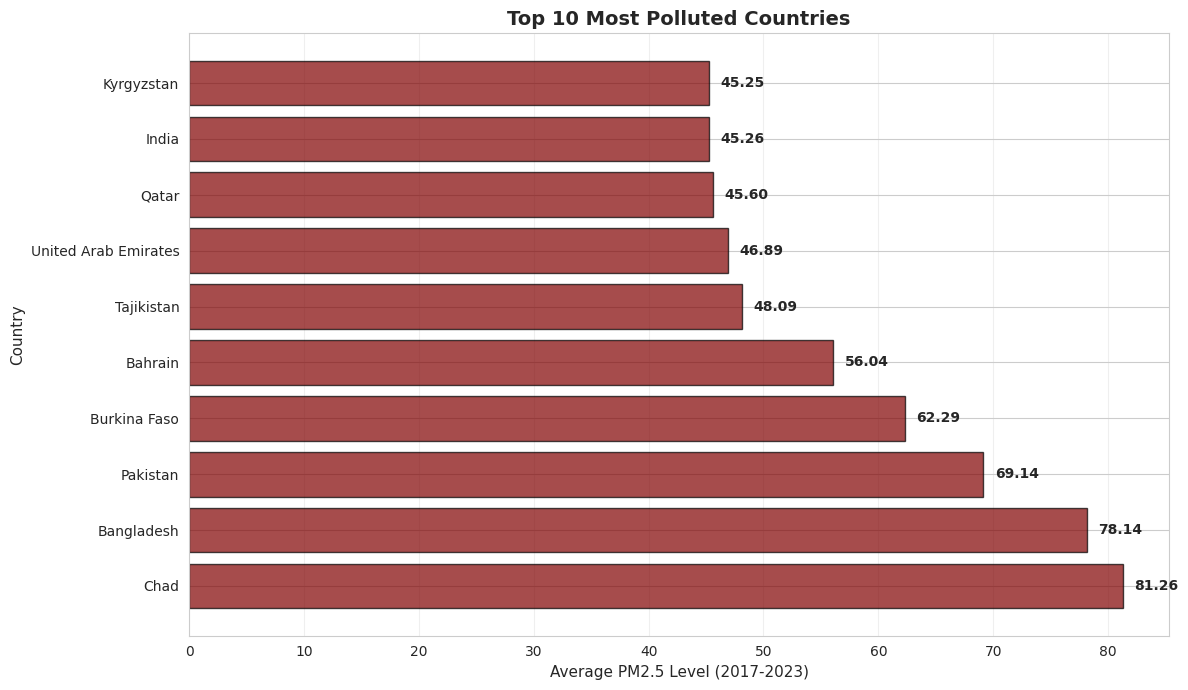


TOP 10 MOST POLLUTED COUNTRIES
country
Chad                   81.257
Bangladesh             78.143
Pakistan               69.138
Burkina Faso           62.286
Bahrain                56.043
Tajikistan             48.089
United Arab Emirates   46.890
Qatar                  45.600
India                  45.260
Kyrgyzstan             45.250


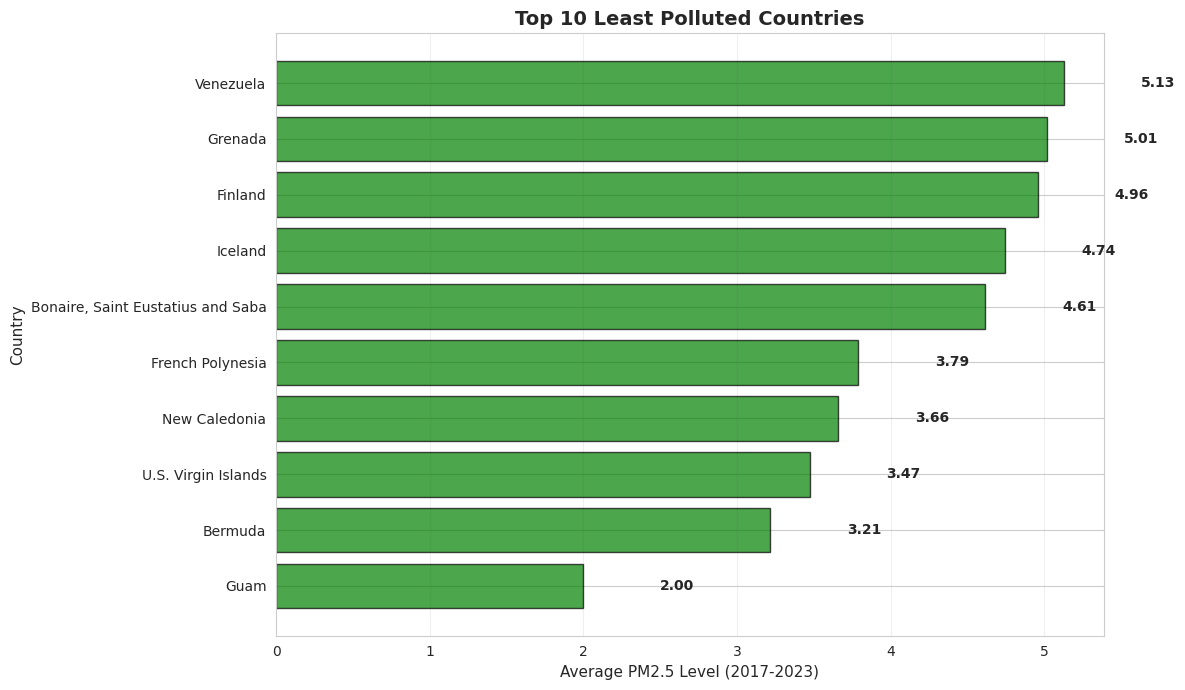


TOP 10 LEAST POLLUTED COUNTRIES
country
Guam                                2.000
Bermuda                             3.214
U.S. Virgin Islands                 3.471
New Caledonia                       3.657
French Polynesia                    3.786
Bonaire, Saint Eustatius and Saba   4.614
Iceland                             4.743
Finland                             4.957
Grenada                             5.014
Venezuela                           5.129


In [41]:
# 8.5 Air Pollution Dataset - Geographic Distribution
country_avg_pollution = df_pollution.groupby('country')[year_cols].mean().mean(axis=1).sort_values(ascending=False)

# Top 10 most polluted countries
top10_polluted = country_avg_pollution.head(10)

plt.figure(figsize=(12, 7))
plt.barh(range(len(top10_polluted)), top10_polluted.values, color='maroon', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top10_polluted)), top10_polluted.index)
plt.xlabel('Average PM2.5 Level (2017-2023)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Most Polluted Countries', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top10_polluted.values):
    plt.text(v + 1, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 10 MOST POLLUTED COUNTRIES")
print("="*60)
print(top10_polluted.to_string())

# Bottom 10 least polluted countries
bottom10_polluted = country_avg_pollution.tail(10).sort_values(ascending=True)

plt.figure(figsize=(12, 7))
plt.barh(range(len(bottom10_polluted)), bottom10_polluted.values, color='green', edgecolor='black', alpha=0.7)
plt.yticks(range(len(bottom10_polluted)), bottom10_polluted.index)
plt.xlabel('Average PM2.5 Level (2017-2023)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Least Polluted Countries', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(bottom10_polluted.values):
    plt.text(v + 0.5, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TOP 10 LEAST POLLUTED COUNTRIES")
print("="*60)
print(bottom10_polluted.to_string())

## 8.6 Air Pollution Distribution Statistics

This final EDA section provides comprehensive statistical analysis of PM2.5 pollution levels across all cities and years:
- **Histogram**: Shows the frequency distribution of pollution values
- **Box Plot**: Displays the median, quartiles, and outliers in the pollution data
- **Descriptive Statistics**: Calculates mean, median, standard deviation, min/max, and percentiles
- **WHO Guideline Comparison**: Compares measurements against the World Health Organization's recommended annual average of 5 μg/m³

This analysis reveals the overall severity of air pollution and how many locations exceed safe levels.

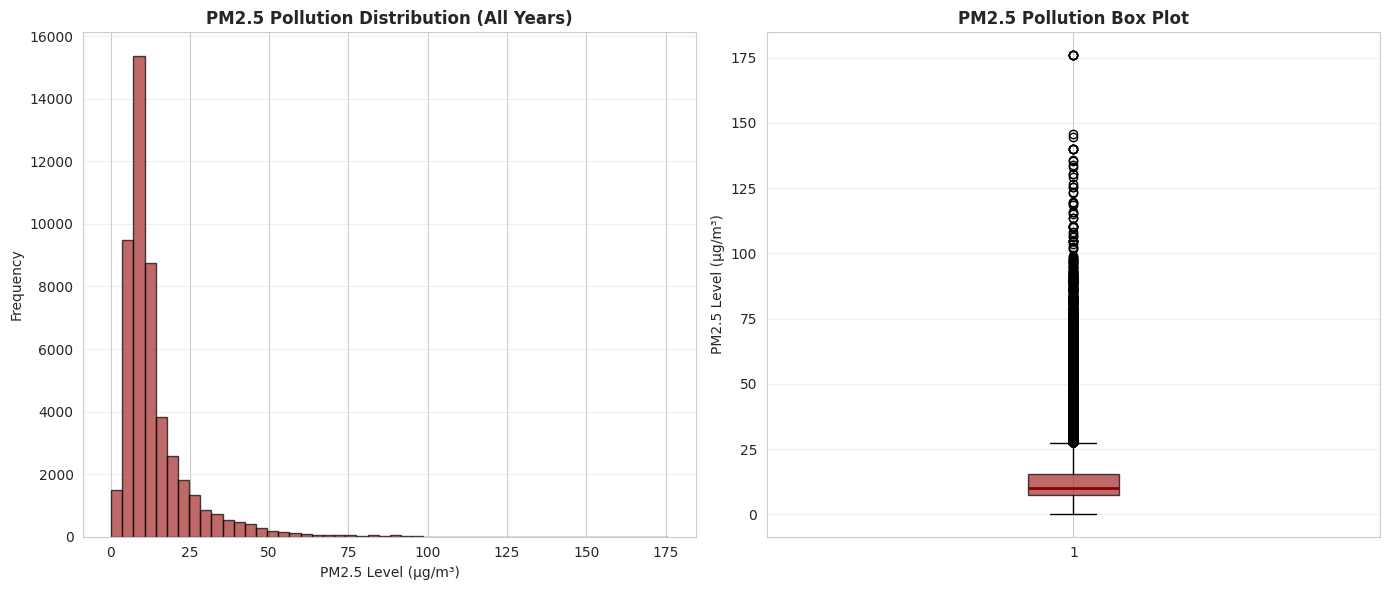


POLLUTION DISTRIBUTION STATISTICS
Mean: 13.91 μg/m³
Median: 10.20 μg/m³
Std Dev: 11.77
Min: 0.20 μg/m³
Max: 175.90 μg/m³
25th Percentile: 7.50 μg/m³
75th Percentile: 15.50 μg/m³

📌 WHO Air Quality Guideline: 5 μg/m³ annual average
Cities above WHO guideline: 45,325 (92.7%)


In [42]:
# 8.6 Air Pollution Dataset - Distribution Analysis
pollution_values = df_pollution[year_cols].values.flatten()
pollution_values = pollution_values[~np.isnan(pollution_values)]  # Remove NaN values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(pollution_values, bins=50, edgecolor='black', color='brown', alpha=0.7)
plt.title('PM2.5 Pollution Distribution (All Years)', fontsize=12, fontweight='bold')
plt.xlabel('PM2.5 Level (μg/m³)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(pollution_values, vert=True, patch_artist=True,
            boxprops=dict(facecolor='brown', alpha=0.7),
            medianprops=dict(color='darkred', linewidth=2))
plt.title('PM2.5 Pollution Box Plot', fontsize=12, fontweight='bold')
plt.ylabel('PM2.5 Level (μg/m³)', fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("POLLUTION DISTRIBUTION STATISTICS")
print("="*60)
print(f"Mean: {np.mean(pollution_values):.2f} μg/m³")
print(f"Median: {np.median(pollution_values):.2f} μg/m³")
print(f"Std Dev: {np.std(pollution_values):.2f}")
print(f"Min: {np.min(pollution_values):.2f} μg/m³")
print(f"Max: {np.max(pollution_values):.2f} μg/m³")
print(f"25th Percentile: {np.percentile(pollution_values, 25):.2f} μg/m³")
print(f"75th Percentile: {np.percentile(pollution_values, 75):.2f} μg/m³")

# WHO Air Quality Guidelines
print("\n📌 WHO Air Quality Guideline: 5 μg/m³ annual average")
above_who = (pollution_values > 5).sum()
pct_above = (above_who / len(pollution_values)) * 100
print(f"Cities above WHO guideline: {above_who:,} ({pct_above:.1f}%)")

# 9. Advanced Visualizations

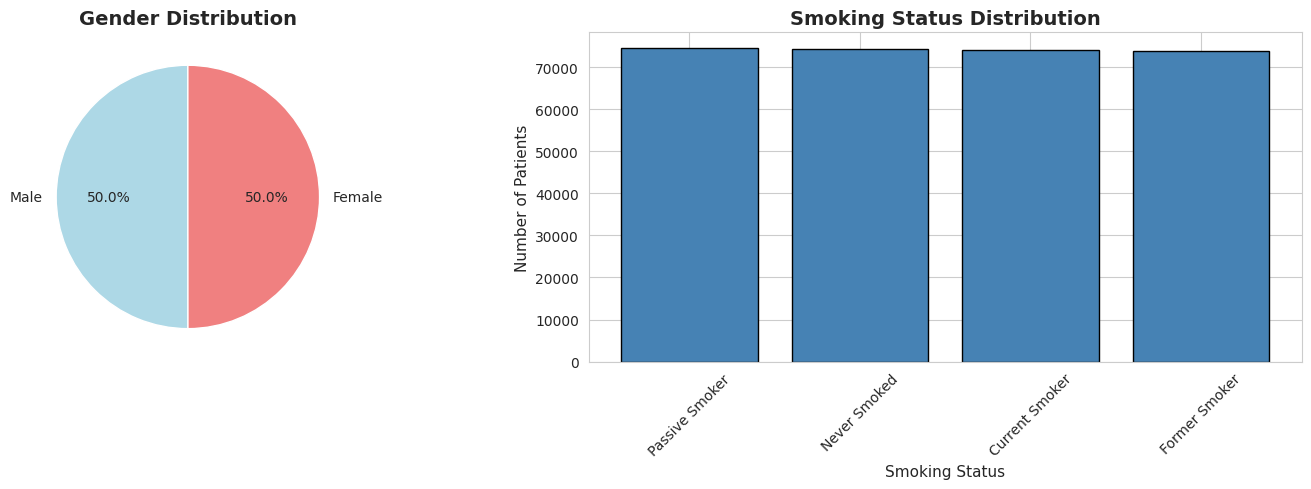

✓ Gender and Smoking visualizations created


In [43]:
# 9. Advanced Visualizations

## 9.1 Gender and Smoking Status Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gender pie chart
gender_counts = df_medical['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            colors=['lightblue', 'lightcoral'], startangle=90)
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')

# Smoking status bar chart
smoking_counts = df_medical['smoking_status'].value_counts()
axes[1].bar(smoking_counts.index, smoking_counts.values, color='steelblue', edgecolor='black')
axes[1].set_title('Smoking Status Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Smoking Status', fontsize=11)
axes[1].set_ylabel('Number of Patients', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✓ Gender and Smoking visualizations created")

# 10. Corellation Analysis

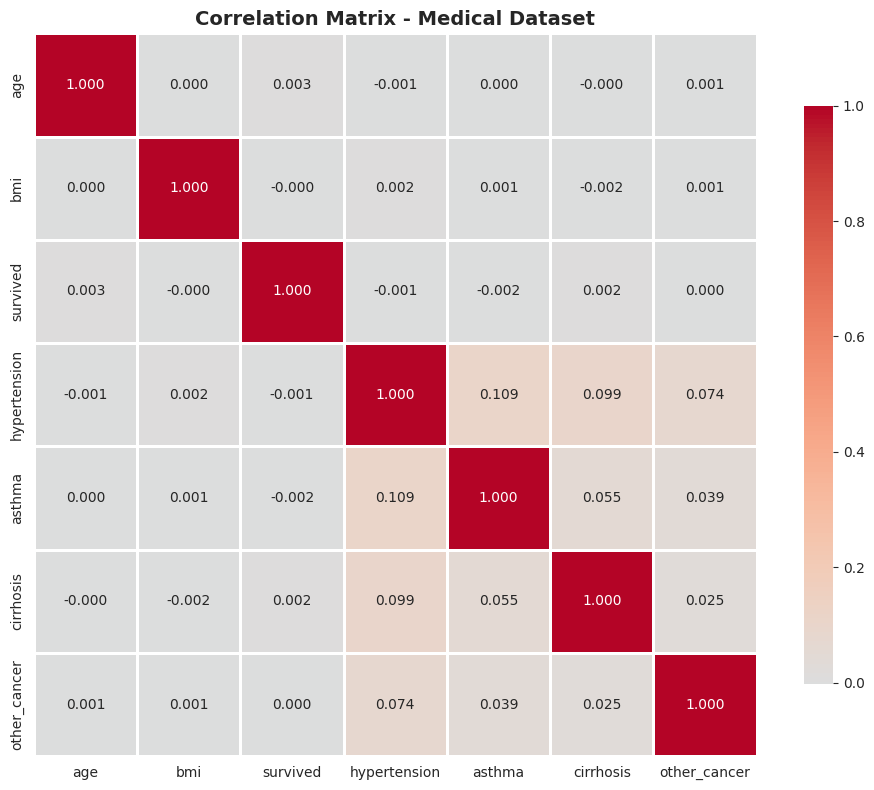


KEY CORRELATIONS WITH SURVIVAL
survived        1.000
age             0.003
cirrhosis       0.002
other_cancer    0.000
bmi            -0.000
hypertension   -0.001
asthma         -0.002
Name: survived, dtype: float64

📊 Interpretation:
  - Positive correlation: Variable increases with survival
  - Negative correlation: Variable decreases with survival
  - Close to 0: No strong relationship


In [44]:
# 10. Correlation Analysis

## 10.1 Correlation Matrix for Numerical Variables
numerical_cols = ['age', 'bmi', 'survived', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
correlation_matrix = df_medical[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Medical Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY CORRELATIONS WITH SURVIVAL")
print("="*60)
survival_corr = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_corr)

print("\n📊 Interpretation:")
print("  - Positive correlation: Variable increases with survival")
print("  - Negative correlation: Variable decreases with survival")
print("  - Close to 0: No strong relationship")

# 11. Survival Analysis

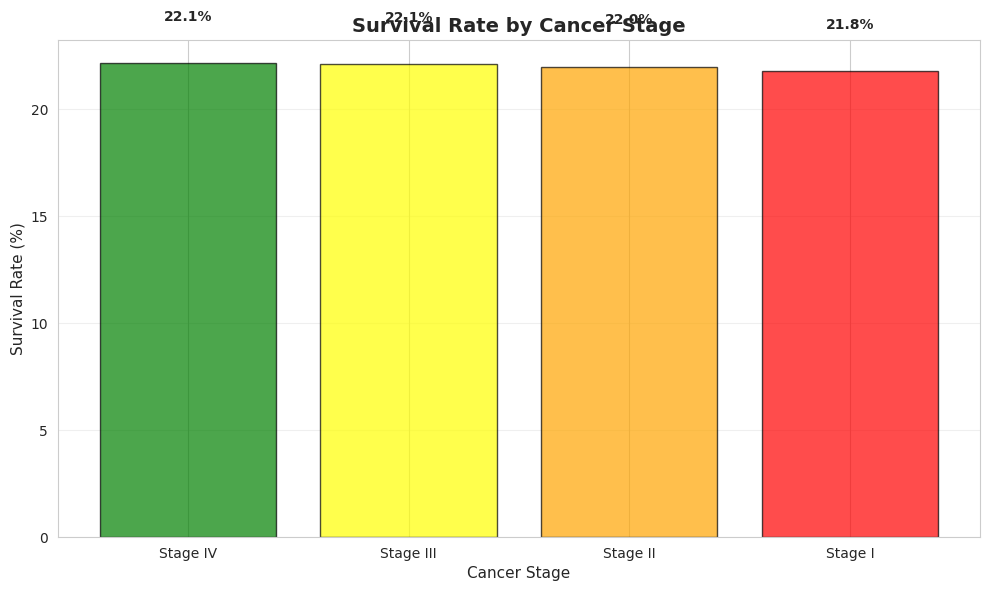


SURVIVAL RATE BY CANCER STAGE
              mean  count  survival_rate
cancer_stage                            
Stage IV     0.221  74357         22.143
Stage III    0.221  74416         22.112
Stage II     0.220  73906         21.983
Stage I      0.218  73987         21.782


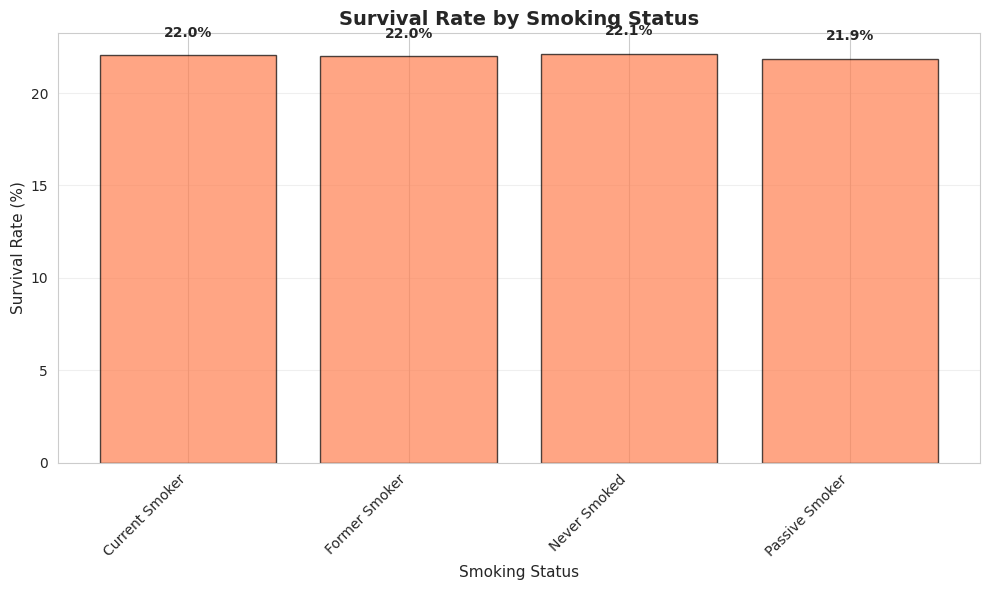


SURVIVAL RATE BY SMOKING STATUS
                mean  count  survival_rate
smoking_status                            
Current Smoker 0.220  74019         22.036
Former Smoker  0.220  73827         21.999
Never Smoked   0.221  74282         22.126
Passive Smoker 0.219  74538         21.861


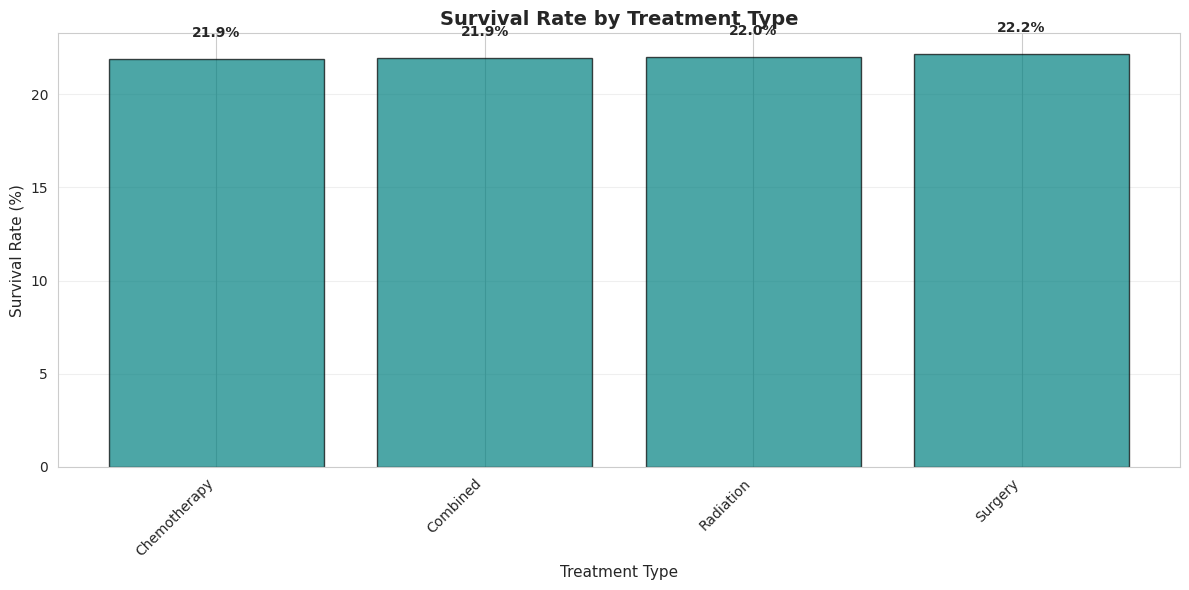


TREATMENT EFFECTIVENESS ANALYSIS
                survival_rate  count
treatment_type                      
Chemotherapy           21.901  74589
Combined               21.948  74048
Radiation              22.008  73688
Surgery                22.165  74341


In [45]:
# 11. Survival Analysis by Risk Factors

## 11.1 Survival by Cancer Stage
stage_survival = df_medical.groupby('cancer_stage')['survived'].agg(['mean', 'count'])
stage_survival['survival_rate'] = stage_survival['mean'] * 100
stage_survival = stage_survival.sort_values('survival_rate', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(stage_survival.index, stage_survival['survival_rate'], 
               color=['green', 'yellow', 'orange', 'red'], edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Cancer Stage', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Stage', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(stage_survival['survival_rate']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY CANCER STAGE")
print("="*60)
print(stage_survival)

## 11.2 Survival by Smoking Status
smoking_survival = df_medical.groupby('smoking_status')['survived'].agg(['mean', 'count'])
smoking_survival['survival_rate'] = smoking_survival['mean'] * 100

plt.figure(figsize=(10, 6))
plt.bar(smoking_survival.index, smoking_survival['survival_rate'], 
        color='coral', edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(smoking_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY SMOKING STATUS")
print("="*60)
print(smoking_survival)

## 9.3 Treatment Type Effectiveness (Survival Rate by Treatment)
treatment_survival = df_medical.groupby('treatment_type')['survived'].agg(['mean', 'count'])
treatment_survival['survival_rate'] = treatment_survival['mean'] * 100

plt.figure(figsize=(12, 6))
plt.bar(treatment_survival.index, treatment_survival['survival_rate'], 
        color='teal', edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Treatment Type', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Type', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(treatment_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TREATMENT EFFECTIVENESS ANALYSIS")
print("="*60)
print(treatment_survival[['survival_rate', 'count']])